# Point Estimates

> The sample statistic is calculated from the sample data and the population parameter is inferred (or estimated) from this sample statistic. Let me say that again: Statistics are calculated, parameters are estimated. - James Jones [(Source)](https://people.richland.edu/james/lecture/m170/ch08-int.html)

## Data

Today we will be using an API to download wage and classification information for 500 random employees out of the total 12,401 City of Seattle Employees as of October 2019.

## Import Necessary Packages

In [22]:
import pandas as pd
from matplotlib import pyplot as plt
import requests
import random
import json

## Import Necessary Data

In [2]:
total_employees = 12401
sample_size = 500

## Call the API to Retrieve the City of Seattle Wage Data

Randomly select 500 employees of the 12,401. How would you do this?

To help you, here is a list of all of the available parameters you can use: https://dev.socrata.com/docs/queries/. 

*Note: notice that the parameters each have a `$` before them.*

### 1. Make a request to the API

In [23]:
url = "https://data.seattle.gov/resource/2khk-5ukd.json"

params = {"$limit": None, "$offset": None}

response = requests.get(url, params)
response.json()

[{'department': 'Office for Civil Rights',
  'last_name': 'Lockhart',
  'first_name': 'Mariko',
  'job_title': 'Executive3',
  'hourly_rate': '80.95'},
 {'department': 'Fire Department',
  'last_name': 'Dawson',
  'first_name': 'Iris',
  'job_title': 'Permit Tech',
  'hourly_rate': '31.63'},
 {'department': 'Fire Department',
  'last_name': 'Sutey',
  'first_name': 'Debra',
  'job_title': 'Fire Battalion Chief-91.4 Hrs',
  'hourly_rate': '64.41'},
 {'department': 'Fire Department',
  'last_name': 'Canez',
  'first_name': 'Aaron',
  'job_title': 'Fireftr-90.46 Hrs',
  'hourly_rate': '39.02'},
 {'department': 'Fire Department',
  'last_name': 'Berry',
  'first_name': 'David',
  'job_title': 'Fire Lieut-90.46 Hrs',
  'hourly_rate': '45.3'},
 {'department': 'Fire Department',
  'last_name': 'Castaneda',
  'first_name': 'Leonardo',
  'job_title': 'Fireftr-90.46 Hrs',
  'hourly_rate': '39.76'},
 {'department': 'Fire Department',
  'last_name': 'Ballew',
  'first_name': 'Sean',
  'job_title':

In [31]:
total_employees = len(response.json())

### 2. Limit request to obtain one single employee

In [24]:
params = {"$limit": 1, "$offset": None}

response1 = requests.get(url, params)
response1.json()

[{'department': 'Office for Civil Rights',
  'last_name': 'Lockhart',
  'first_name': 'Mariko',
  'job_title': 'Executive3',
  'hourly_rate': '80.95'}]

### 3. Pick the 50th employee

In [25]:
params = {"$limit": 1, "$offset": 50}

response2 = requests.get(url, params)
response2.json()

[{'department': 'Construction & Inspections',
  'last_name': 'Tate',
  'first_name': 'Stephanie',
  'job_title': 'Personnel Spec',
  'hourly_rate': '36.13'}]

### 4. Pick one single random employee

*Note: use [`random.randint()`](https://docs.python.org/3.7/library/random.html#random.randint) to ensure the selection of a random employee*

In [26]:
random.seed(2019)
params = {"$limit": 1, "$offset": random.randint(1, total_employees)}

response3 = requests.get(url, params)
response3.json()

[{'department': 'Parks & Recreation',
  'last_name': 'Kliment',
  'first_name': 'Pamela',
  'job_title': 'Plng&Dev Spec II',
  'hourly_rate': '42.06'}]

### 5. Pick 500 random employees

*Note: be sure to make use the `total_employees` and `sample_size` variables.*

In [30]:
employees = []
seed = 1

for employee in list(range(0, sample_size, 1)):
    random.seed(seed)
    params['$offset'] = random.randint(1, total_employees)
    employee = requests.get(url, params)
    employees.append(employee.json())
    seed += 7


### 6. Transform `city_wages` into a DataFrame (`city_wages_df`) and calculate the mean `hourly_rate` from your random sample

In [41]:
city_wages = list(map(lambda x: x[0], employees))

In [54]:
city_wages_df = pd.DataFrame(city_wages)

In [59]:
city_wages_df = city_wages_df.astype({'hourly_rate': 'float'})

In [74]:
print(f"The mean hourly rate is {round(city_wages_df['hourly_rate'].mean(), 2)} dollars per hour.")

The mean hourly rate is 41.64 dollars per hour.


### 7. Make a visualization that shows the distribution of `hourly_rate`

*Note: please assign a title to your plot and label your axes as well*

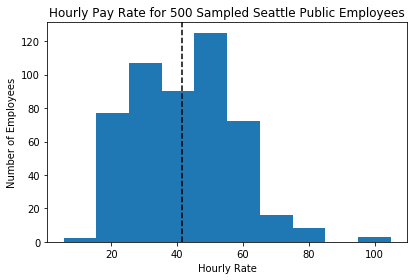

In [70]:
fig, ax = plt.subplots()

ax.hist(city_wages_df['hourly_rate'], bins = 10)
ax.axvline(city_wages_df['hourly_rate'].mean(), linestyle='--', color='black')
ax.set_xlabel('Hourly Rate')
ax.set_ylabel('Number of Employees')
ax.set_title("Hourly Pay Rate for 500 Sampled Seattle Public Employees")
fig.tight_layout()